In [1]:
import pandas as pd
import numpy as np

from konlpy.tag import Okt
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [2]:
han=Hannanum()
df = pd.read_csv('clustering.csv')
df.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [3]:
doc = []

for i in df['기사내용']:
    doc.append(han.nouns(i))
    
for i in range(len(doc)):
    doc[i] = ' '.join(doc[i])
    
doc[0]

'유한양행 얀센 바이오테크(Janssen 표적 항암 치료제 기술이전 계약 체결 5일 공시 기술수출금액 12억5500만달러(한화 약 1조3416억원 계약금 5000만달러 개발 허가 매출 단계별 마일스톤 12억500만달러 수령 예정 경상기술료 순매출액 책정 유한양행 관계자 기술이전 계약 수익 식 임상시험 허가 등 성공여부 수 미실현 가능성'

In [4]:
cv = CountVectorizer()
X = cv.fit_transform(doc)

In [5]:
df_cv = pd.DataFrame(X.toarray(), columns=cv.get_feature_names())
df_cv

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [55]:
kmeans = KMeans(n_clusters=10).fit(df_cv)
kmeans.labels_

array([2, 0, 2, 2, 0, 7, 9, 8, 3, 6, 4, 1, 5, 1, 1])

In [47]:
len(cv.get_feature_names())

581

In [48]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [56]:
pca = PCA(n_components=3)
PC = pca.fit_transform(df_cv)

In [59]:
PC_df = pd.DataFrame(data = PC, columns = ['pc1', 'pc2', 'pc3'])
PC_df.index = df['검색어']

In [60]:
PC_df

,pc1,pc2,pc3
검색어,,,
유한양행,-2.245408,-4.167454,-0.684657
유한양행,-3.613951,-9.898581,4.677489
유한양행,-2.932636,-7.159359,1.514813
유한양행,-2.142773,-3.757110,-1.074041
유한양행,-3.397880,-8.904283,4.370186
라돈,-3.456162,0.931166,-1.767200
라돈,-4.172639,2.527029,-1.364223
라돈,-6.418892,7.240862,1.237041
라돈,-7.928539,10.011249,2.382525


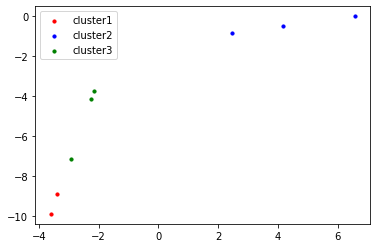

In [62]:
# x축 : first y축 : second 번호로 나타낸 후 plot으로 시각화
plt.scatter(PC_df.iloc[kmeans.labels_ == 0,0], PC_df.iloc[kmeans.labels_ ==0, 1],
           s = 10, c = 'red', label = 'cluster1')

plt.scatter(PC_df.iloc[kmeans.labels_ == 1,0], PC_df.iloc[kmeans.labels_ ==1, 1],
           s = 10, c = 'blue', label = 'cluster2')
            
plt.scatter(PC_df.iloc[kmeans.labels_ == 2,0], PC_df.iloc[kmeans.labels_ ==2, 1],
           s = 10, c = 'green', label = 'cluster3')
            
plt.legend()
plt.show()

In [63]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [64]:
df_cv

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [69]:
cluster = AgglomerativeClustering(n_clusters=10, linkage='ward')
cluster.fit_predict(df_cv)

array([0, 3, 0, 0, 3, 9, 5, 8, 4, 6, 7, 1, 2, 1, 1], dtype=int64)

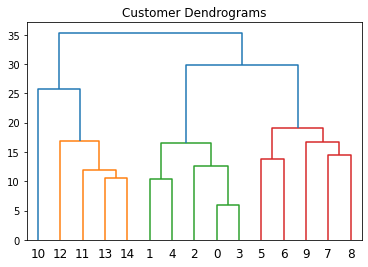

In [71]:
plt.figure()
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(df_cv, method='ward'))

In [72]:
print(doc[5])

침대 매트리스 이 온수매트 라돈 검출 소식 가정 곳곳 라돈 검출 우려 불식 이 라돈측정기 사용 주민 대구 경우 대구시 8월 가정용 라돈측정기 대 대여료 1천원 대구시 당시 가정용 라돈측정기 50대 구입 8개 구청 군청 신분증 지참 신청서 작성 사용료 1천원 선납한 뒤 1박2일간 수 라돈 측정기 벽·천장·바닥 등 50㎝ 이상 사용 출입문 창 전자제품 곳 측정기 뒤 방문 창문 공간 밀폐 다음 측정기 전원 가동 10분 단위 자동 측정 1시간 이상 가동 정확 측정값 수
